# Importing Relevant Libraries and Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
df = pd.read_csv('/content/drive/My Drive/PGPDSE/Capstone/CSV Files/Diabetes_Preprocessed.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,preceding_year_visits,number_diab_meds,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Not Available,Referral,1,41,0,1,0,0,0,Diabetes,Not Required,Not Required,1,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,no_med
1,Caucasian,0,15,Emergency,Discharged to home,Emergency,3,59,0,18,0,0,0,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,insulin_only
2,AfricanAmerican,0,25,Emergency,Discharged to home,Emergency,2,11,5,13,2,0,1,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,1,0,3,1,0,other_meds
3,Caucasian,1,35,Emergency,Discharged to home,Emergency,2,44,1,16,0,0,0,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,insulin_only
4,Caucasian,1,45,Emergency,Discharged to home,Emergency,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,0,0,2,0,insulin_combo


# EDA

## Multi-Collinearity

### Spearman Corrleation

In [ ]:
df1 = df.copy()
obj = df1.select_dtypes('O').columns
le = LabelEncoder()
for i in obj:
    df1[i] = le.fit_transform(df1[i])

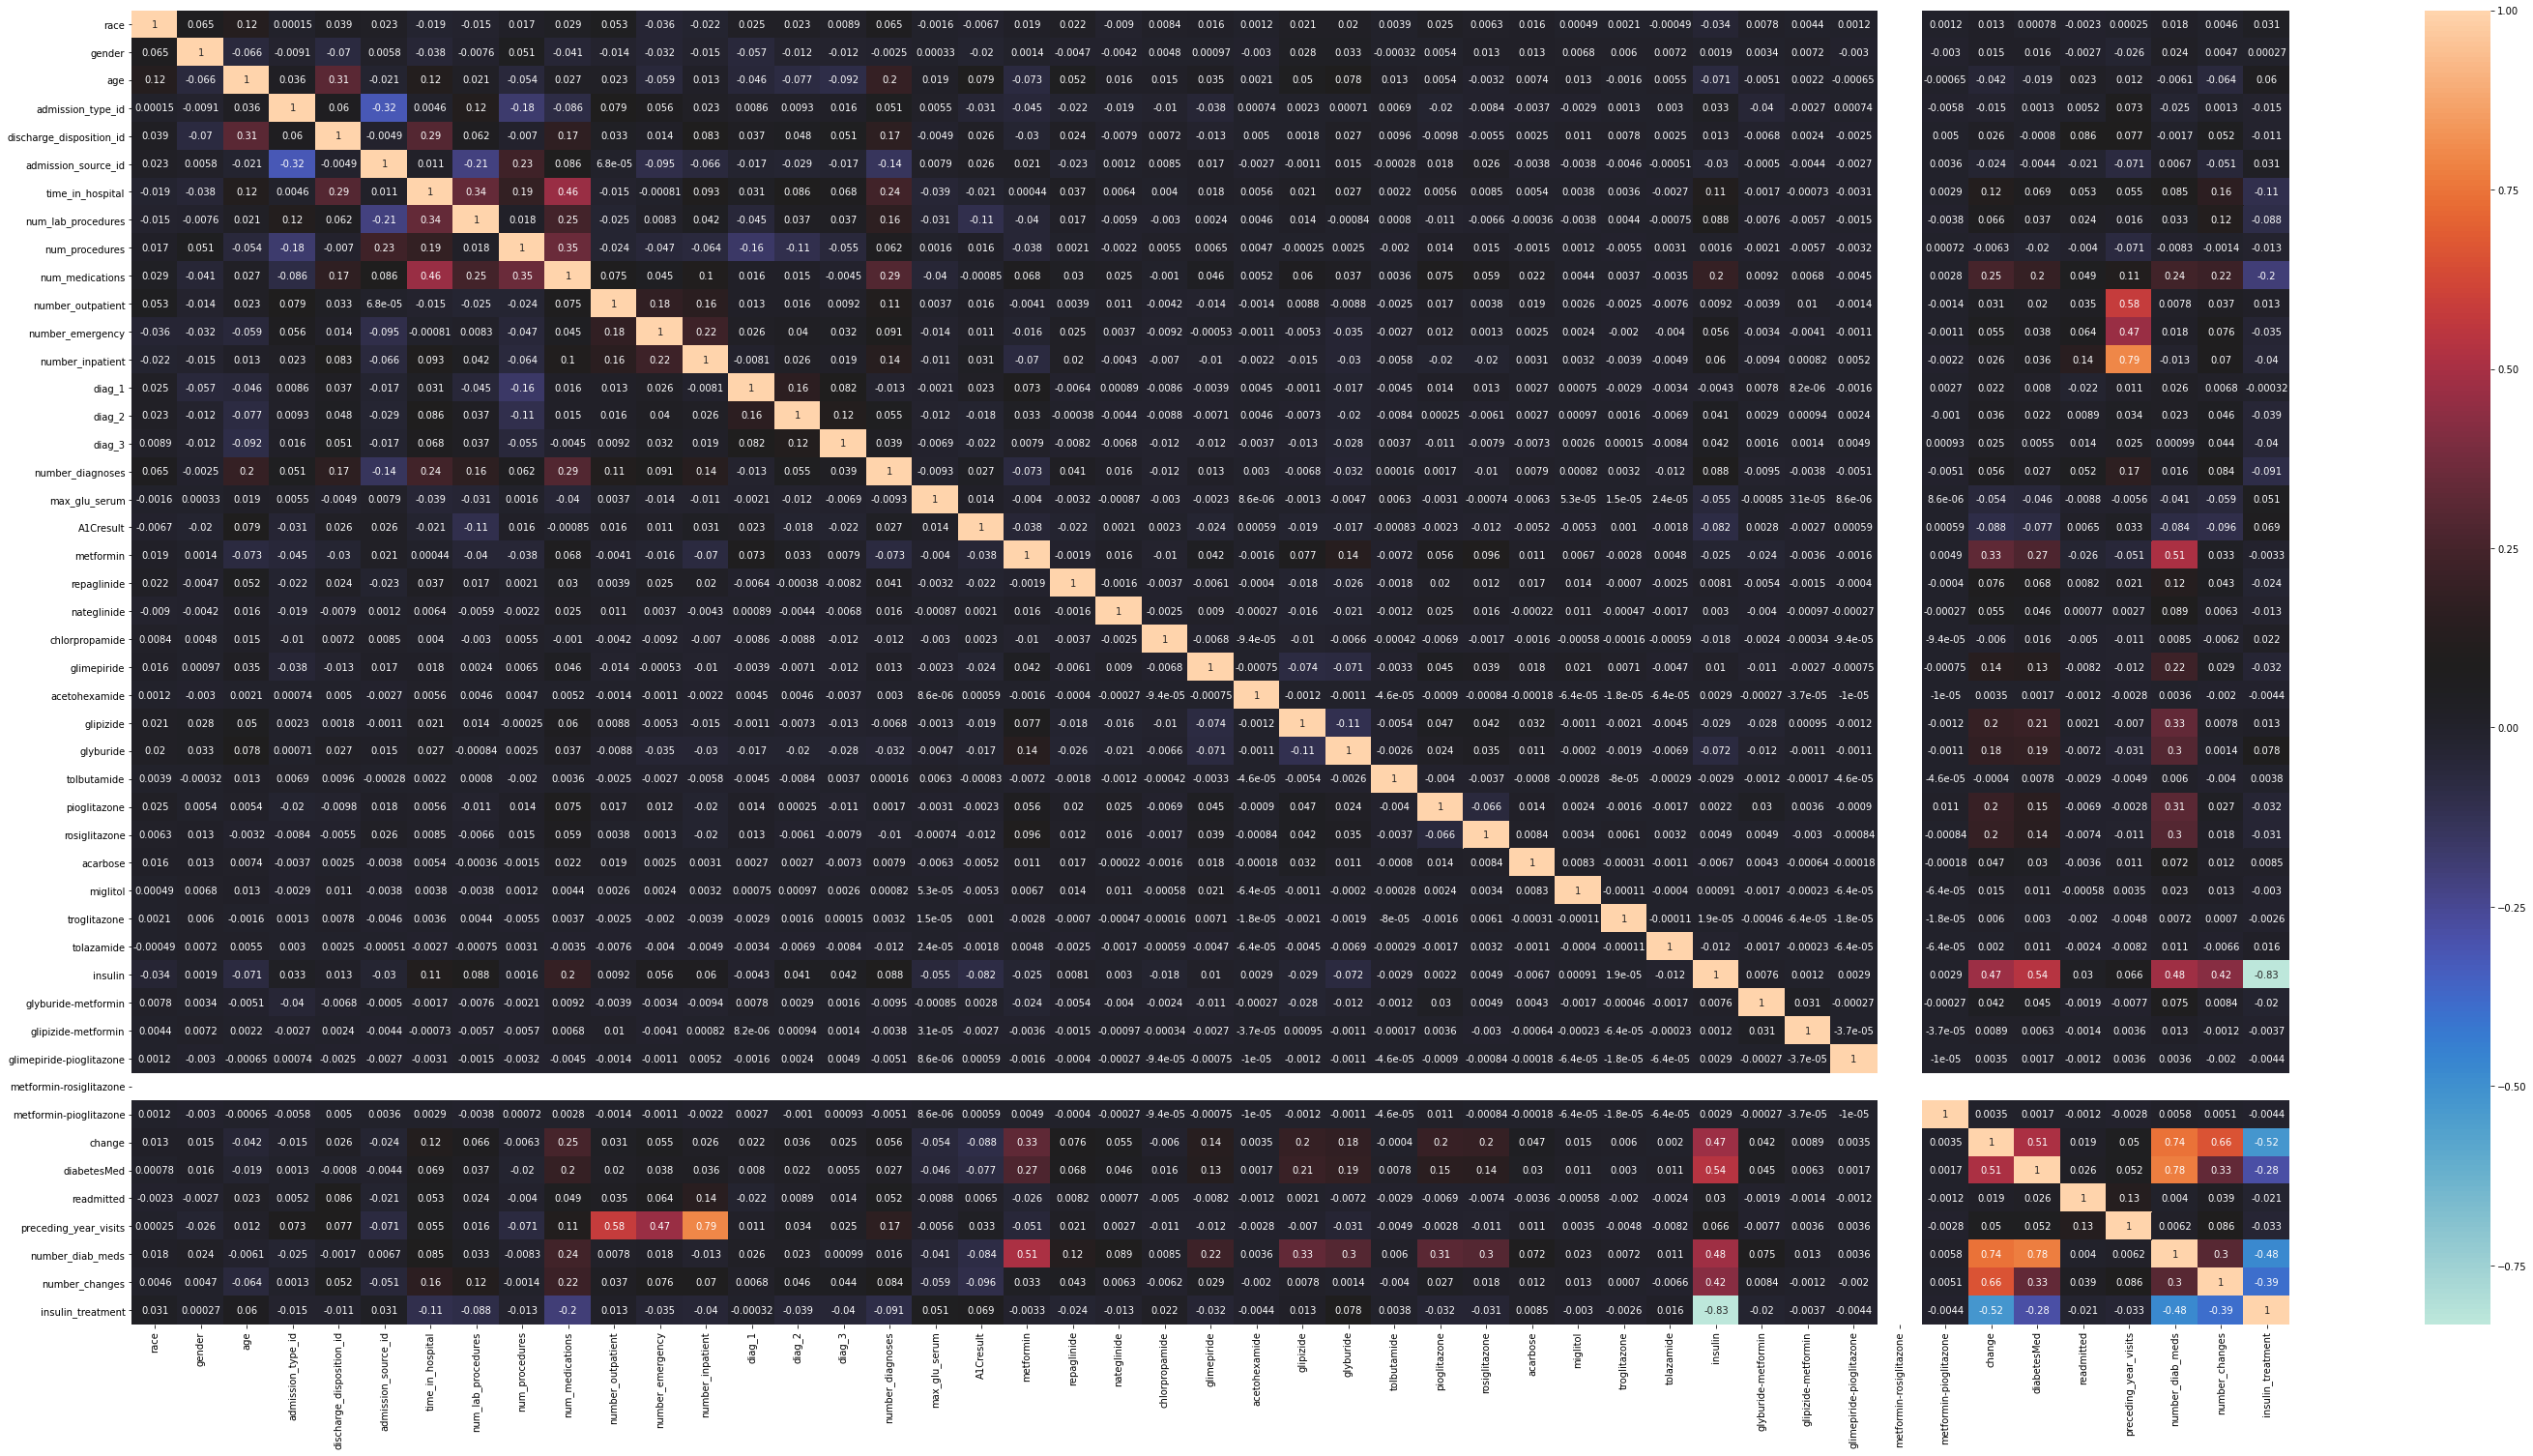

In [ ]:
plt.figure(figsize = (50, 25))
sns.heatmap(df1.corr(method = 'spearman'), annot = True, cmap = 'icefire')
plt.show()

## Outliers and Skewness

### Box-Plots

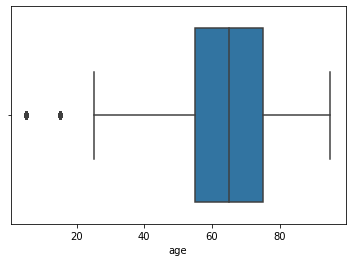

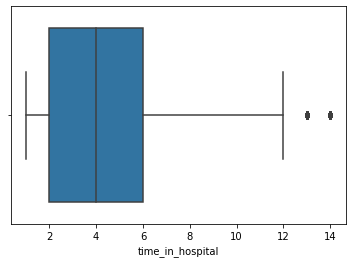

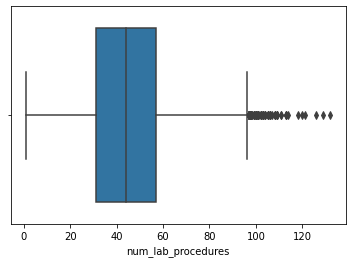

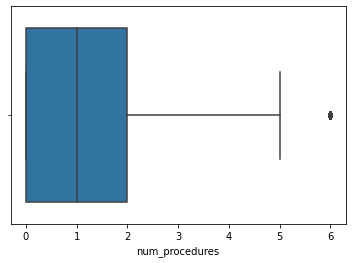

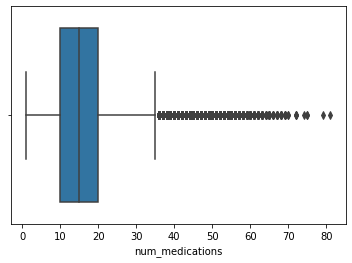

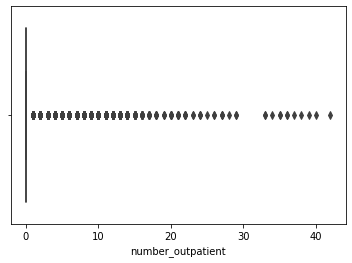

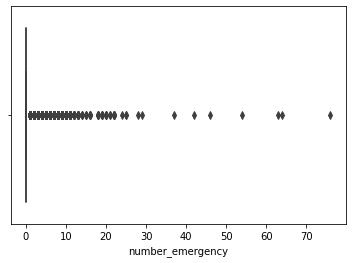

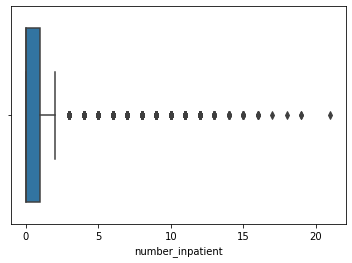

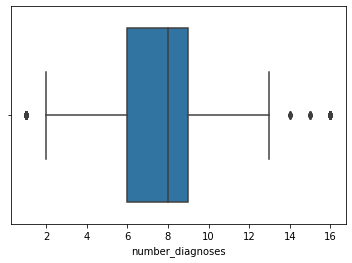

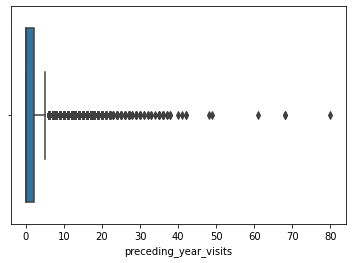

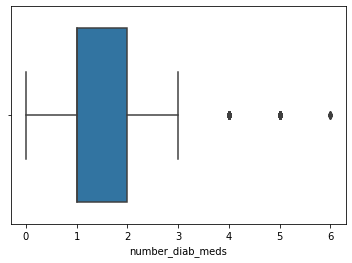

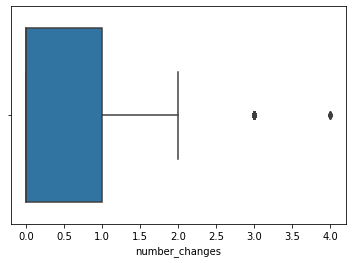

In [7]:
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency',
            'number_inpatient', 'number_diagnoses','preceding_year_visits', 'number_diab_meds', 'number_changes']
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

### Transformation

In [ ]:
pt = PowerTransformer(method = 'yeo-johnson')
df_pt = pd.DataFrame(pt.fit_transform(df[num_cols]), columns = num_cols)
skew_df = pd.DataFrame({"Skew_Before" : df[num_cols].skew(), "Skew_After" : df_pt.skew()})
skew_df

,Skew_Before,Skew_After
age,-0.625265,-0.119083
time_in_hospital,1.141139,0.012974
num_lab_procedures,-0.239703,-0.230143
num_procedures,1.320396,0.207424
num_medications,1.331329,0.019316
number_outpatient,8.811273,1.796058
number_emergency,22.651846,2.438005
number_inpatient,3.616376,0.737851
number_diagnoses,-0.885529,-0.154843
preceding_year_visits,5.327782,0.409350


## Statistical Tests for Significance

In [8]:
p_val = []
sig = []
for i in df.columns:
    if i in num_cols:
        stat, p = stats.f_oneway(df[df['readmitted'] == 0][i], df[df['readmitted'] == 1][i])
    else:
        ct = pd.crosstab(df[i], df['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})
stats_df

,columns,p_value,significance
0,race,1.263105e-01,Insignificant
1,gender,4.095739e-01,Insignificant
2,age,3.275694e-11,Significant
3,admission_type_id,6.554917e-08,Significant
4,discharge_disposition_id,1.002865e-175,Significant
5,admission_source_id,1.937846e-09,Significant
6,time_in_hospital,6.893070e-49,Significant
7,num_lab_procedures,3.503248e-14,Significant
8,num_procedures,1.530071e-03,Significant
9,num_medications,1.128847e-39,Significant


In [11]:
sig_cols = stats_df[stats_df['significance'] == 'Significant']['columns'].reset_index(drop = True)
insig_cols = stats_df[stats_df['significance'] == 'Insignificant']['columns'].reset_index(drop = True)
print(sig_cols)

0                          age
1            admission_type_id
2     discharge_disposition_id
3          admission_source_id
4             time_in_hospital
5           num_lab_procedures
6               num_procedures
7              num_medications
8            number_outpatient
9             number_emergency
10            number_inpatient
11                      diag_1
12                      diag_2
13                      diag_3
14            number_diagnoses
15               max_glu_serum
16                   A1Cresult
17                   metformin
18                 repaglinide
19                 glimepiride
20                   glipizide
21                pioglitazone
22                     insulin
23                      change
24                 diabetesMed
25                  readmitted
26       preceding_year_visits
27              number_changes
28           insulin_treatment
Name: columns, dtype: object


In [12]:
print(insig_cols)

0                         race
1                       gender
2                  nateglinide
3               chlorpropamide
4                acetohexamide
5                    glyburide
6                  tolbutamide
7                rosiglitazone
8                     acarbose
9                     miglitol
10                troglitazone
11                  tolazamide
12         glyburide-metformin
13         glipizide-metformin
14    glimepiride-pioglitazone
15     metformin-rosiglitazone
16      metformin-pioglitazone
17            number_diab_meds
Name: columns, dtype: object


In [54]:
df = df.drop(['admission_type_id', 'number_outpatient', 'number_inpatient', 'number_emergency', 'change', 'number_diab_meds'], 1)
p_val = []
sig = []
for i in df.columns:
    if i in num_cols:
        stat, p = stats.f_oneway(df[df['readmitted'] == 0][i], df[df['readmitted'] == 1][i])
    else:
        ct = pd.crosstab(df[i], df['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})
stats_df

,columns,p_value,significance
0,race,1.263105e-01,Insignificant
1,gender,4.095739e-01,Insignificant
2,age,3.275694e-11,Significant
3,discharge_disposition_id,1.002865e-175,Significant
4,admission_source_id,1.937846e-09,Significant
5,time_in_hospital,6.893070e-49,Significant
6,num_lab_procedures,3.503248e-14,Significant
7,num_procedures,1.530071e-03,Significant
8,num_medications,1.128847e-39,Significant
9,diag_1,7.642047e-28,Significant


In [60]:
stats_df.sort_values('p_value', ascending = True)
stats_df

,columns,p_value,significance
38,preceding_year_visits,0.000000e+00,Significant
37,readmitted,0.000000e+00,Significant
3,discharge_disposition_id,1.002865e-175,Significant
12,number_diagnoses,1.181113e-62,Significant
5,time_in_hospital,6.893070e-49,Significant
30,insulin,1.450024e-43,Significant
8,num_medications,1.128847e-39,Significant
40,insulin_treatment,1.750135e-39,Significant
39,number_changes,3.627420e-30,Significant
11,diag_3,5.426864e-30,Significant


# Feature Selection

## Iterations w.r.t. Different Features

italicised text### Checking Admission Type ID

In [ ]:
X = pd.get_dummies(df.drop(['admission_type_id', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("LogReg", LogisticRegression(random_state = 0, solver = 'liblinear', n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
X = pd.get_dummies(df.drop(['readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("LogReg", LogisticRegression(random_state = 0, solver = 'liblinear', n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
X = pd.get_dummies(df.drop(['admission_type_id', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
X = pd.get_dummies(df.drop(['readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [34]:
df = df.drop('admission_type_id', 1)

### Checking Emergency, Inpatient, Outpatient, Preceding Year Visits

In [ ]:
X = pd.get_dummies(df.drop(['number_emergency', 'number_outpatient', 'number_inpatient', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
X = pd.get_dummies(df.drop(['preceding_year_visits', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [35]:
df = df.drop(['number_emergency', 'number_inpatient', 'number_outpatient'], 1)

### Checking Change vs Number of changes

In [ ]:
X = pd.get_dummies(df.drop(['change', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
X = pd.get_dummies(df.drop(['number_changes', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [36]:
df = df.drop('change', 1)

### Checking Diabetes Meds VS Number of Diabetes Meds

In [ ]:
X = pd.get_dummies(df.drop(['diabetesMed', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
X = pd.get_dummies(df.drop(['number_diab_meds', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [37]:
df = df.drop('number_diab_meds', 1)

### Checkig Insulin Treatment column

In [ ]:
X = pd.get_dummies(df.drop(['insulin_treatment', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
X = pd.get_dummies(df.drop(['insulin', 'readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
X = pd.get_dummies(df.drop(['readmitted'], 1), drop_first = True)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
pipe = Pipeline([("Transformer", PowerTransformer()),
                 ("Scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(random_state = 0, n_jobs = -1))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

## Medicines Iterations

In [40]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [41]:
sig_meds = sig_cols[17:23]
insig_meds = insig_cols[2:17]
print(sig_meds)
print()
print(insig_meds)

17       metformin
18     repaglinide
19     glimepiride
20       glipizide
21    pioglitazone
22         insulin
Name: columns, dtype: object

2                  nateglinide
3               chlorpropamide
4                acetohexamide
5                    glyburide
6                  tolbutamide
7                rosiglitazone
8                     acarbose
9                     miglitol
10                troglitazone
11                  tolazamide
12         glyburide-metformin
13         glipizide-metformin
14    glimepiride-pioglitazone
15     metformin-rosiglitazone
16      metformin-pioglitazone
Name: columns, dtype: object


In [42]:
print("Statistically (Chi-Square) Insiginificant Medicines being given to patients as follows:")
for i in insig_meds:
        vc = df[i].value_counts().values
        print(i, " - {} patients".format(vc[1:].sum()))

Statistically (Chi-Square) Insiginificant Medicines being given to patients as follows:
nateglinide  - 681 patients
chlorpropamide  - 83 patients
acetohexamide  - 1 patients
glyburide  - 10250 patients
tolbutamide  - 20 patients
rosiglitazone  - 6163 patients
acarbose  - 299 patients
miglitol  - 38 patients
troglitazone  - 3 patients
tolazamide  - 39 patients
glyburide-metformin  - 671 patients
glipizide-metformin  - 13 patients
glimepiride-pioglitazone  - 1 patients
metformin-rosiglitazone  - 0 patients
metformin-pioglitazone  - 1 patients


In [43]:
for i in insig_meds:
    print(i, '\n', df[df[i] != -2]['readmitted'].value_counts(), '\n')

nateglinide 
 0    601
1     80
Name: readmitted, dtype: int64 

chlorpropamide 
 0    78
1     5
Name: readmitted, dtype: int64 

acetohexamide 
 0    1
Name: readmitted, dtype: int64 

glyburide 
 0    9145
1    1105
Name: readmitted, dtype: int64 

tolbutamide 
 0    19
1     1
Name: readmitted, dtype: int64 

rosiglitazone 
 0    5513
1     650
Name: readmitted, dtype: int64 

acarbose 
 0    271
1     28
Name: readmitted, dtype: int64 

miglitol 
 0    34
1     4
Name: readmitted, dtype: int64 

troglitazone 
 0    3
Name: readmitted, dtype: int64 

tolazamide 
 0    36
1     3
Name: readmitted, dtype: int64 

glyburide-metformin 
 0    599
1     72
Name: readmitted, dtype: int64 

glipizide-metformin 
 0    12
1     1
Name: readmitted, dtype: int64 

glimepiride-pioglitazone 
 0    1
Name: readmitted, dtype: int64 

metformin-rosiglitazone 
 Series([], Name: readmitted, dtype: int64) 

metformin-pioglitazone 
 0    1
Name: readmitted, dtype: int64 



In [44]:
less_counts = []

for i in meds:
    #print(df[i].value_counts(), '\n')

    vc = df[i].value_counts().values
    if vc[1:].sum() / vc[0] < 0.01:
        less_counts.append(i)

In [46]:
less_counts, len(less_counts) # Being given to less than 1% of the population, i.e. less than 970 people

(['nateglinide',
  'chlorpropamide',
  'acetohexamide',
  'tolbutamide',
  'acarbose',
  'miglitol',
  'troglitazone',
  'tolazamide',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-rosiglitazone',
  'metformin-pioglitazone'],
 13)

In [47]:
for i in less_counts:
    print(df[i].value_counts(), '\n')

-2    96389
 0      647
 1       23
-1       11
Name: nateglinide, dtype: int64 

-2    96987
 0       76
 1        6
-1        1
Name: chlorpropamide, dtype: int64 

-2    97069
 0        1
Name: acetohexamide, dtype: int64 

-2    97050
 0       20
Name: tolbutamide, dtype: int64 

-2    96771
 0      286
 1       10
-1        3
Name: acarbose, dtype: int64 

-2    97032
 0       31
-1        5
 1        2
Name: miglitol, dtype: int64 

-2    97067
 0        3
Name: troglitazone, dtype: int64 

-2    97031
 0       38
 1        1
Name: tolazamide, dtype: int64 

-2    96399
 0      662
 1        6
-1        3
Name: glyburide-metformin, dtype: int64 

-2    97057
 0       13
Name: glipizide-metformin, dtype: int64 

-2    97069
 0        1
Name: glimepiride-pioglitazone, dtype: int64 

-2    97070
Name: metformin-rosiglitazone, dtype: int64 

-2    97069
 0        1
Name: metformin-pioglitazone, dtype: int64 



In [48]:
df = df.drop(less_counts, 1)

In [49]:
df.shape

(97070, 28)

## Exporting File Before Feature Selection Modelling

In [50]:
df.to_csv('/content/drive/My Drive/PGPDSE/Capstone/CSV Files/Diabetes_Preprocessed_Before_Feature_Selection.csv', index = False)

In [51]:
df.to_csv('Diabetes_Preprocessed_Before_Feature_Selection.csv', index = False)

## Model Selection Before Feature Selection Techniques

In [ ]:
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,diabetesMed,readmitted,preceding_year_visits,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Referral,1,41,0,1,Diabetes,Not Required,Not Required,1,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,no_med
1,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,1,0,0,1,insulin_only
2,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,0,3,0,other_meds
3,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,1,0,0,1,insulin_only
4,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,-2,0,-2,-2,-2,0,-2,1,0,0,0,insulin_combo


In [ ]:
X = df.drop('readmitted', 1)
X_dum = pd.get_dummies(X, drop_first = True)
y = df['readmitted']
X.shape, X_dum.shape, y.shape

((97070, 29), (97070, 97), (97070,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state = 0, test_size = 0.3, stratify = y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((67949, 97), (67949,), (29121, 97), (29121,))

In [ ]:
models = []

models.append(('LR', Pipeline([("Transformer", PowerTransformer()),
                               ("Scaler", StandardScaler()),
                               ("LogReg", LogisticRegression(random_state = 0, solver = 'liblinear', n_jobs = -1))])))
models.append(('KNN', Pipeline([("Transformer", PowerTransformer()),
                               ("Scaler", StandardScaler()),
                               ("KNN", KNeighborsClassifier(n_jobs = -1))])))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('BC',BaggingClassifier(random_state = 0, n_jobs = -1)))
models.append(('ET',ExtraTreesClassifier(random_state = 0, n_jobs = -1)))
models.append(('RF', RandomForestClassifier(random_state = 0, n_jobs = -1)))
models.append(('ADA',AdaBoostClassifier(random_state = 0)))
models.append(('GB',GradientBoostingClassifier(random_state = 0)))
models.append(('LGB',LGBMClassifier(random_state = 0, n_jobs = -1)))
models.append(('XGB', XGBClassifier(random_state = 0, n_jobs = -1)))

cv_scores={}

In [ ]:
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'recall', n_jobs = -1)
    cv_scores[name]="%f (%f)" % (cv_results.mean(), cv_results.std())
    #print(cv_results)
cv_scores

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'ADA': '0.000899 (0.000822)',
 'BC': '0.020040 (0.003452)',
 'DT': '0.164052 (0.012981)',
 'ET': '0.006166 (0.002284)',
 'GB': '0.002826 (0.002055)',
 'KNN': '0.030190 (0.002244)',
 'LGB': '0.003340 (0.001835)',
 'LR': '0.000128 (0.000385)',
 'RF': '0.002827 (0.000962)',
 'XGB': '0.001027 (0.001120)'}

In [ ]:
X_train1, X_validate, y_train1, y_validate = train_test_split(X_train, y_train, random_state = 0, test_size = 0.1, stratify = y_train)
X_train1.shape, y_train1.shape, X_validate.shape, y_validate.shape

((61154, 97), (61154,), (6795, 97), (6795,))

In [ ]:
precision = []
recall = []
names = []
f1 = []
f1_weighted = []
roc_auc = []

for name, model in models:
    model.fit(X_train1, y_train1)
    y_pred = model.predict(X_validate)
    y_proba = model.predict_proba(X_validate)[:, 1]
    precision.append(precision_score(y_validate, y_pred))
    recall.append(recall_score(y_validate, y_pred))
    f1.append(f1_score(y_validate, y_pred))
    f1_weighted.append(f1_score(y_validate, y_pred, average = 'weighted'))
    roc_auc.append(roc_auc_score(y_validate, y_proba))
    names.append(name)
models_df = pd.DataFrame({'Model' : names, 'Precision' : precision, 'Recall' : recall,
                          'F1' : f1, 'F1-Weighted' : f1_weighted, 'ROC_AUC' : roc_auc})
models_df

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


,Model,Precision,Recall,F1,F1-Weighted,ROC_AUC
0,LR,0.000000,0.000000,0.000000,0.831613,0.630113
1,KNN,0.183976,0.026552,0.046407,0.831551,0.547820
2,DT,0.149412,0.168737,0.158488,0.800119,0.522235
3,BC,0.275109,0.026981,0.049142,0.834581,0.563475
4,ET,0.377778,0.007281,0.014286,0.832981,0.603996
5,RF,0.800000,0.003426,0.006823,0.832568,0.615807
6,ADA,0.500000,0.000857,0.001710,0.831852,0.639473
7,GB,0.478261,0.004711,0.009330,0.832675,0.642365
8,LGB,0.423077,0.004711,0.009318,0.832601,0.636366
9,XGB,0.666667,0.002570,0.005119,0.832305,0.642934


## Mutual Information

In [ ]:
MI_score = mutual_info_classif(X_dum, y, random_state = 0)
MI_df = pd.DataFrame({'Score' : MI_score, "Columns" : X_dum.columns}).sort_values(by = 'Score', ascending = False)
MI_df

,Score,Columns
9,0.019939,nateglinide
14,0.018850,rosiglitazone
8,0.018502,repaglinide
10,0.018060,glimepiride
16,0.017870,glyburide-metformin
11,0.017406,glipizide
89,0.017229,max_glu_serum_None
13,0.015869,pioglitazone
12,0.015403,glyburide
7,0.014911,metformin


## Sequential Forward Selection

In [ ]:
xgbc = XGBClassifier(random_state = 0, n_jobs = -1)

# Create an SFS object
sfs = SFS(estimator = xgbc,
          k_features=(1, X_train.shape[1]),
          forward = True,       # Set forward to True when we want to perform SFS
          scoring = 'recall',
          cv = 5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).sort_values(by = 'avg_score', ascending = False) 
sfs_results

## Sequential Backward Selector

In [ ]:
xgbc = XGBClassifier(random_state = 0, n_jobs = -1)

# Create an SFS object
sbs = SFS(estimator = xgbc,
          k_features=(1, X_train.shape[1]),
          forward = False,       # Set forward to False when we want to perform SBS
          scoring = 'recall',
          cv = 5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sbs = sbs.fit(X_train, y_train)

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sbs.subsets_).sort_values(by = 'avg_score', ascending = False) 
sfs_results

## Random Forest Feature Importance

In [ ]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)

# Train the classifier
rfc.fit(X_train, y_train)

rf_df = pd.DataFrame({'Score' : rfc.feature_importances_, "Columns" : X_train.columns}).sort_values(by = 'Score', ascending = False)
rf_df

,Score,Columns
3,0.098601,num_lab_procedures
5,0.086605,num_medications
2,0.063265,time_in_hospital
18,0.056985,preceding_year_visits
1,0.050822,age
4,0.044313,num_procedures
6,0.039399,number_diagnoses
0,0.022022,gender
15,0.020250,insulin
30,0.017747,admission_source_id_Referral
